# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [5]:
import pandas as pd
df = pd.read_csv('advertising.csv')

#imprimindo a base de dados
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
#imprimindo as informações do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

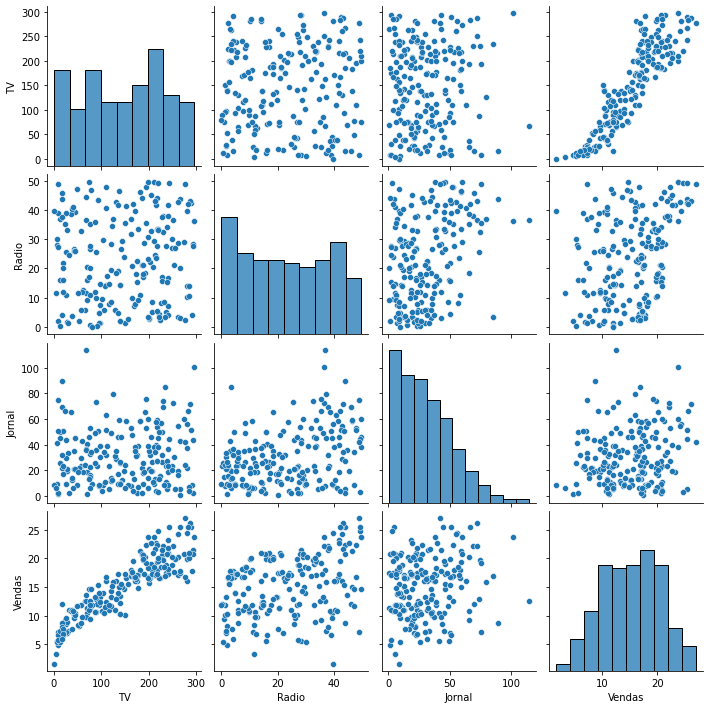

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

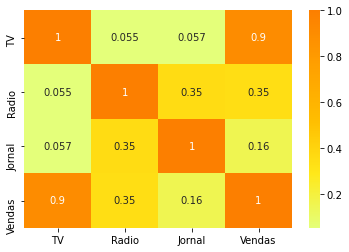

In [10]:
sns.heatmap(df.corr(), cmap = 'Wistia', annot =True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [11]:
from sklearn.model_selection import train_test_split 
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
import numpy as np 

#treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#teste AI 
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RMSE da Regressão Linear: {rmse_lin}")

r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² do Random Forest: {r2_rf}")
print(f"RMSE da Random Forest: {rmse_rf}")

R² da Regressão Linear: 0.9071151423684273
RMSE da Regressão Linear: 1.5396947656031235
R² do Random Forest: 0.9670747279858216
RMSE da Random Forest: 0.9166992145736799


#### Visualização Gráfica das Previsões

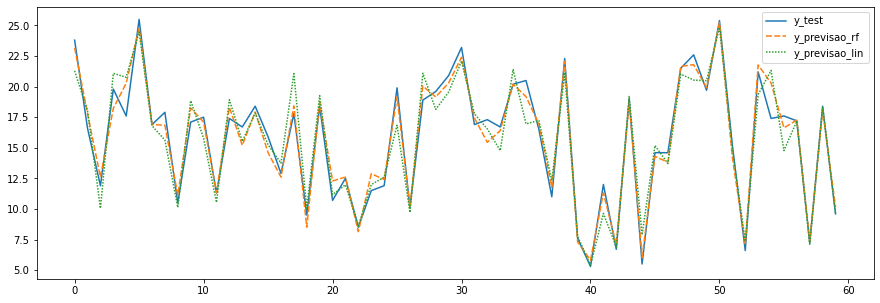

,y_test,y_previsao_rf,y_previsao_lin
0,23.8,23.166,21.288161
1,16.6,17.809,18.042132
2,11.9,12.603,10.059590
3,19.8,18.225,21.082241
4,17.6,20.281,20.764760
5,25.5,24.782,24.471874
6,16.9,16.898,16.806436
7,17.9,16.848,15.628857
8,10.5,11.133,10.124799
9,17.1,18.250,18.846019


In [15]:
df_resultado = pd.DataFrame()
#df_resultado.index = x_test
df_resultado['y_test'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15,5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)


#### Qual a importância de cada variável para as vendas?

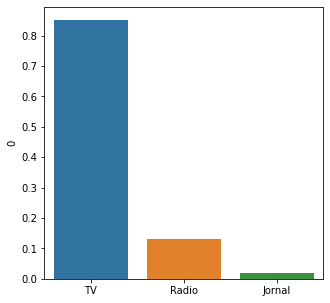

In [16]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_,x_train.columns)
plt.figure(figsize=(5,5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()